<a href="https://colab.research.google.com/github/giriprasath1012/PRODIGY_DS_04/blob/main/DS_traffic_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Loading US accident Dataset

In [3]:
a_data=pd.read_csv('/content/drive/MyDrive/US_Accidents.csv')
a_data.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                         69
County                        0
State                         0
Zipcode                     489
Country                       0
Timezone                   1154
Airport_Code               2658
Weather_Timestamp         22115
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

#Data Cleaning and Data Preprocessing

Removing Unwanted and More Null value Columns from dataset

In [4]:
a_data.drop(columns=['Number','End_Lat','End_Lng','Timezone','Zipcode','Airport_Code','Weather_Timestamp','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)'],axis=1,inplace=True)
a_data.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                         69
County                        0
State                         0
Country                       0
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Weather_Condition         30260
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_

In [5]:
a_data.drop(columns=['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop'],axis=1,inplace=True)
a_data.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                         69
County                        0
State                         0
Country                       0
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Weather_Condition         30260
Sunrise_Sunset               69
Civil_Twilight               69
Nautical_Twilight            69
Astronomical_Twilight        69
dtype: int64

Replacing the null values in the column with mean or mode values

In [6]:
a_data['City'].fillna(a_data['City'].mode()[0],inplace=True)
a_data['Sunrise_Sunset'].fillna(a_data['Sunrise_Sunset'].mode()[0],inplace=True)
a_data['Civil_Twilight'].fillna(a_data['Civil_Twilight'].mode()[0],inplace=True)
a_data['Nautical_Twilight'].fillna(a_data['Nautical_Twilight'].mode()[0],inplace=True)
a_data['Astronomical_Twilight'].fillna(a_data['Astronomical_Twilight'].mode()[0],inplace=True)
a_data['Weather_Condition'].fillna(a_data['Weather_Condition'].mode()[0],inplace=True)

a_data['Temperature(F)'].fillna(a_data['Temperature(F)'].mean(),inplace=True)
a_data['Wind_Chill(F)'].fillna(a_data['Wind_Chill(F)'].mean(),inplace=True)
a_data['Humidity(%)'].fillna(a_data['Humidity(%)'].mean(),inplace=True)
a_data['Pressure(in)'].fillna(a_data['Pressure(in)'].mean(),inplace=True)

a_data.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Country                  0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Weather_Condition        0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

#Exploratory Data Analysis

##Analyzing Patterns related to Weather

Visualization of accidents by weather condition at various Severity

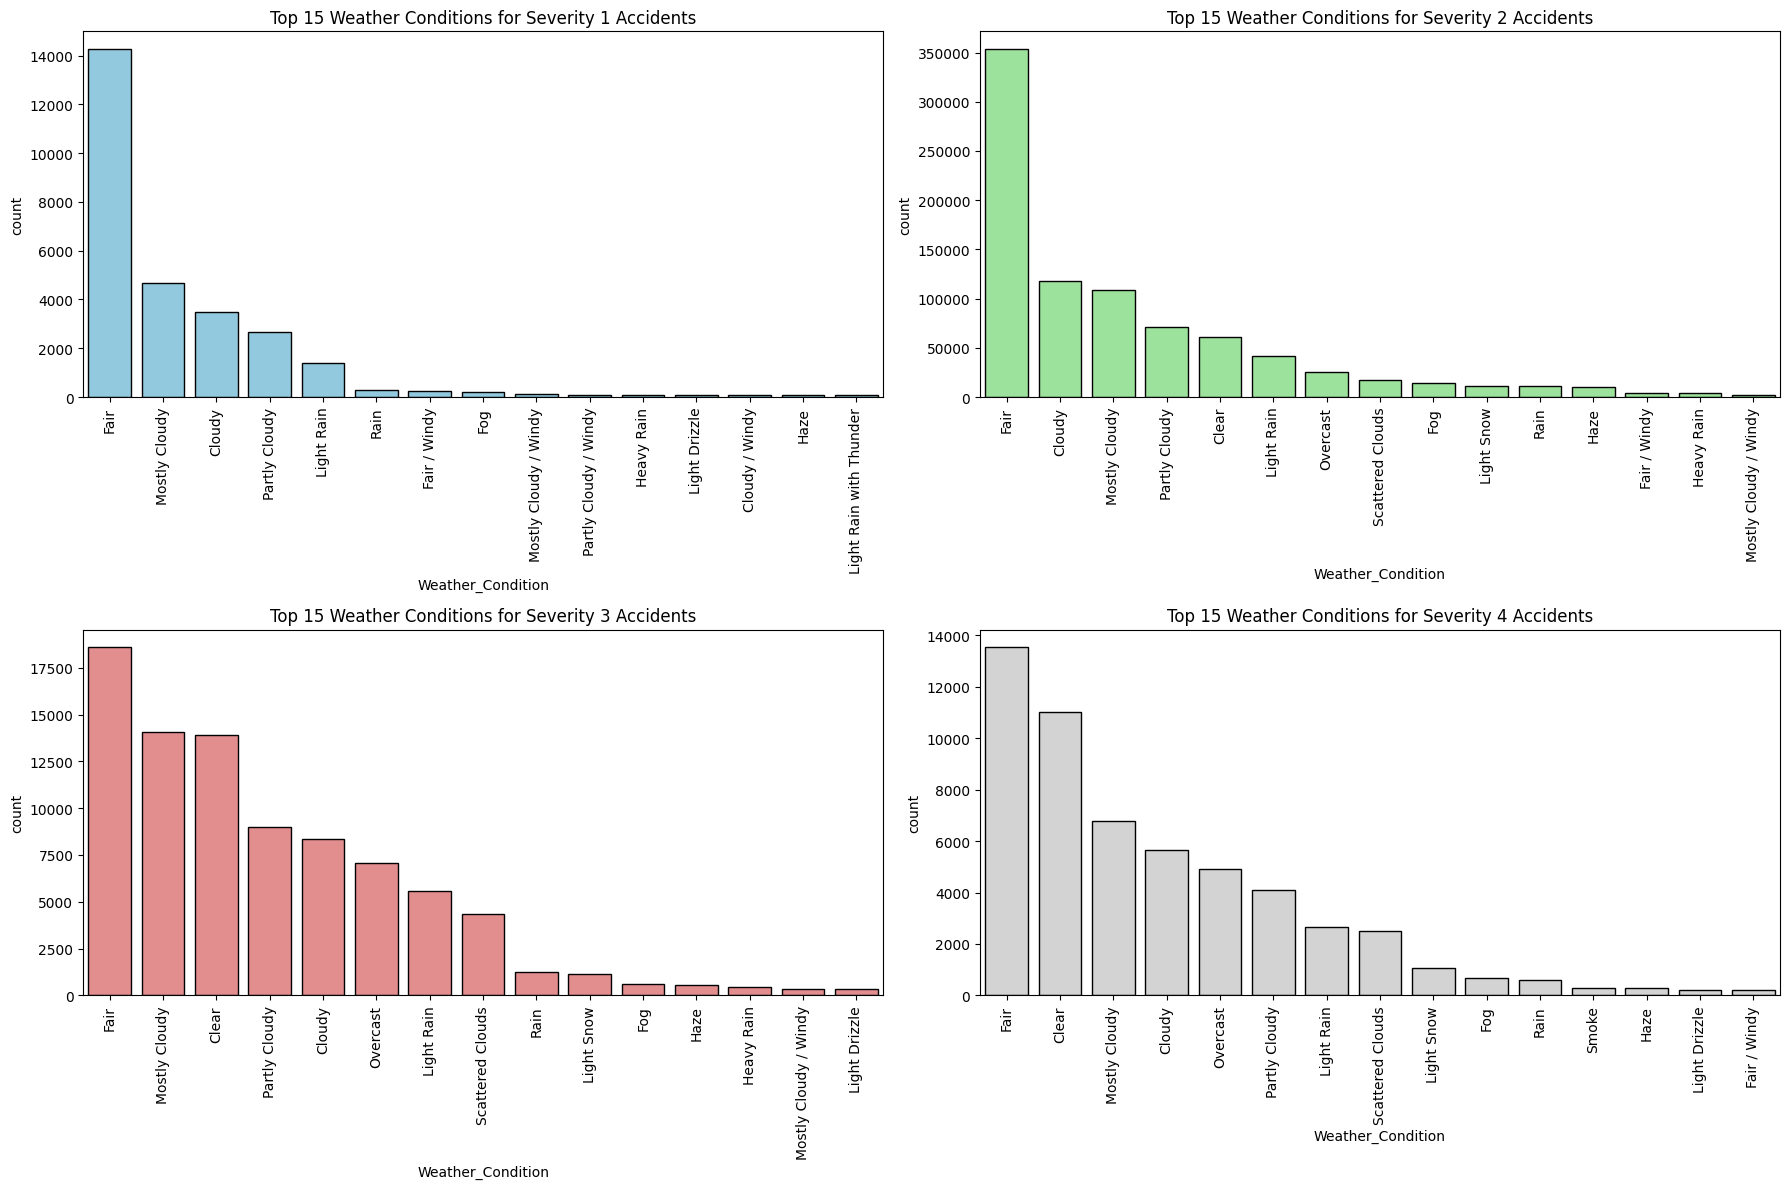

In [7]:
# Severity 1
s1_data = a_data[a_data['Severity'] == 1]
top_15_conditions_s1 = s1_data['Weather_Condition'].value_counts().nlargest(15).index
s1_top_conditions_data = s1_data[s1_data['Weather_Condition'].isin(top_15_conditions_s1)]

# Severity 2
s2_data = a_data[a_data['Severity'] == 2]
top_15_conditions_s2 = s2_data['Weather_Condition'].value_counts().nlargest(15).index
s2_top_conditions_data = s2_data[s2_data['Weather_Condition'].isin(top_15_conditions_s2)]

# Severity 3
s3_data = a_data[a_data['Severity'] == 3]
top_15_conditions_s3 = s3_data['Weather_Condition'].value_counts().nlargest(15).index
s3_top_conditions_data = s3_data[s3_data['Weather_Condition'].isin(top_15_conditions_s3)]

# Severity 4
s4_data = a_data[a_data['Severity'] == 4]
top_15_conditions_s4 = s4_data['Weather_Condition'].value_counts().nlargest(15).index
s4_top_conditions_data = s4_data[s4_data['Weather_Condition'].isin(top_15_conditions_s4)]

# Plotting
plt.figure(figsize=(18, 12))

# Severity 1
plt.subplot(2, 2, 1)
ax = sns.countplot(x='Weather_Condition', data=s1_top_conditions_data, order=top_15_conditions_s1, color='skyblue', edgecolor='black')
plt.title('Top 15 Weather Conditions for Severity 1 Accidents')
plt.xticks(rotation=90)

# Severity 2
plt.subplot(2, 2, 2)
ax = sns.countplot(x='Weather_Condition', data=s2_top_conditions_data, order=top_15_conditions_s2, color='lightgreen', edgecolor='black')
plt.title('Top 15 Weather Conditions for Severity 2 Accidents')
plt.xticks(rotation=90)

# Severity 3
plt.subplot(2, 2, 3)
ax = sns.countplot(x='Weather_Condition', data=s3_top_conditions_data, order=top_15_conditions_s3, color='lightcoral', edgecolor='black')
plt.title('Top 15 Weather Conditions for Severity 3 Accidents')
plt.xticks(rotation=90)

# Severity 4
plt.subplot(2, 2, 4)
ax = sns.countplot(x='Weather_Condition', data=s4_top_conditions_data, order=top_15_conditions_s4, color='lightgray', edgecolor='black')
plt.title('Top 15 Weather Conditions for Severity 4 Accidents')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Accident caused by Rain

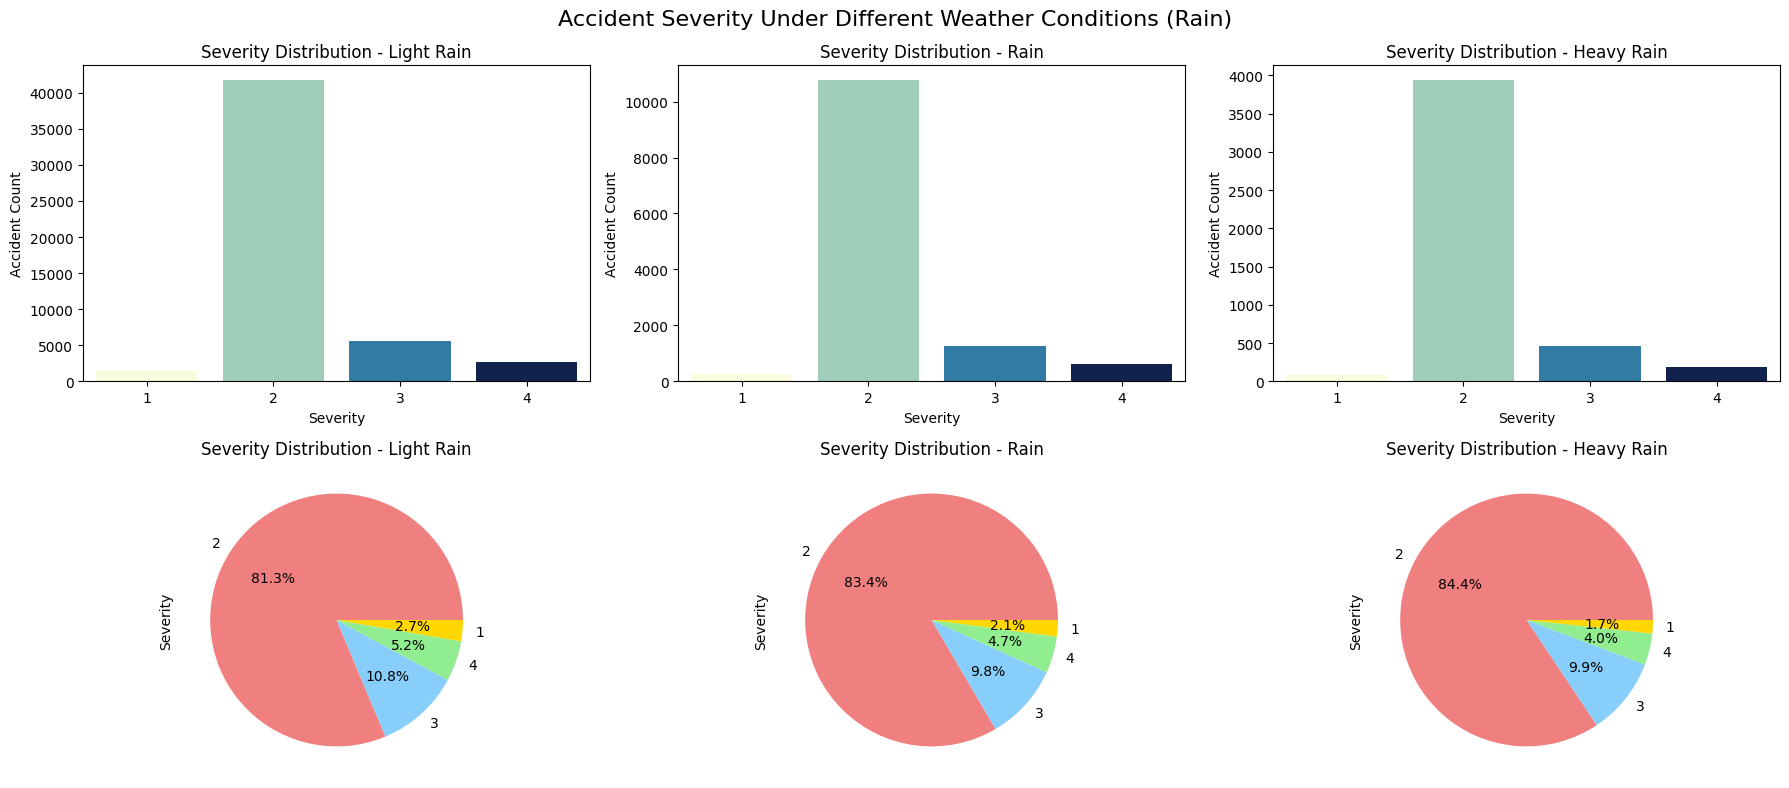

In [8]:
weather_conditions = ["Light Rain", "Rain", "Heavy Rain"]

plt.figure(figsize=(18, 8))
plt.suptitle('Accident Severity Under Different Weather Conditions (Rain)', fontsize=16)

for i, s in enumerate(weather_conditions, start=1):
    plt.subplot(2, len(weather_conditions), i)
    condition_data = a_data[a_data['Weather_Condition'] == s]

    sns.countplot(x='Severity', data=condition_data, hue='Severity', palette='YlGnBu', legend=False)
    plt.xlabel('Severity')
    plt.ylabel('Accident Count')
    plt.title(f'Severity Distribution - {s}')

    plt.subplot(2, len(weather_conditions), i + len(weather_conditions))


    condition_data['Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
    plt.title(f'Severity Distribution - {s}')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Accident caused by Fog

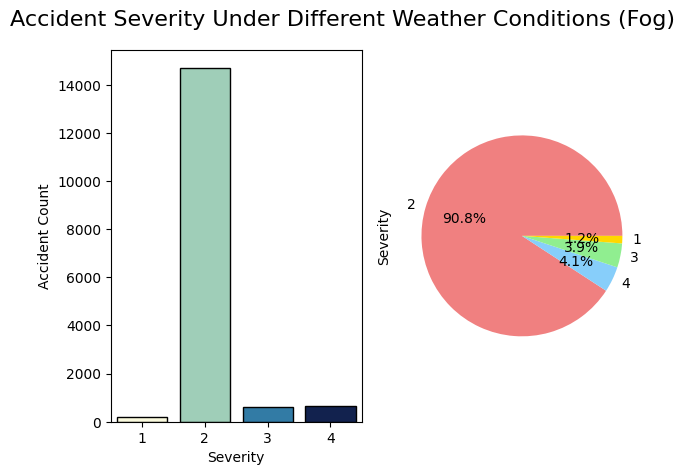

In [9]:
plt.suptitle('Accident Severity Under Different Weather Conditions (Fog)', fontsize=16)

plt.subplot(1,2,1)
condition_data = a_data[a_data['Weather_Condition'] == 'Fog']

sns.countplot(x='Severity', data=condition_data, hue='Severity', palette='YlGnBu', legend=False,edgecolor='black')
plt.xlabel('Severity')
plt.ylabel('Accident Count')

plt.subplot(1,2,2)

condition_data['Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])


plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Accident caused by Snow

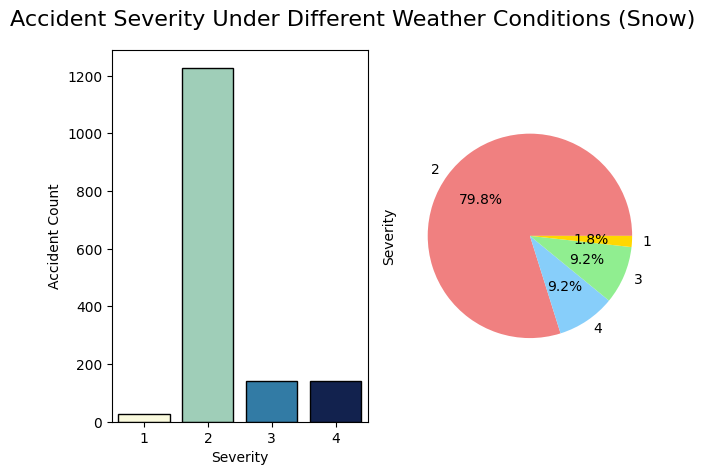

In [10]:
plt.suptitle('Accident Severity Under Different Weather Conditions (Snow)', fontsize=16)

plt.subplot(1,2,1)
condition_data = a_data[a_data['Weather_Condition'] == 'Snow']

sns.countplot(x='Severity', data=condition_data, hue='Severity', palette='YlGnBu', legend=False,edgecolor='black')
plt.xlabel('Severity')
plt.ylabel('Accident Count')

plt.subplot(1,2,2)

condition_data['Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])


plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

##Analyzing Patterns related to Time

Accidents by Day or Night

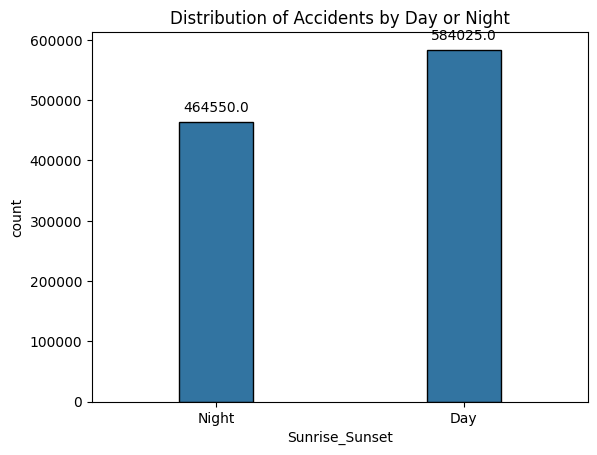

In [11]:
ax=sns.countplot(x='Sunrise_Sunset', data=a_data,width=0.3,edgecolor='black')
plt.title('Distribution of Accidents by Day or Night')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Accidents by hours,weeks,months,years

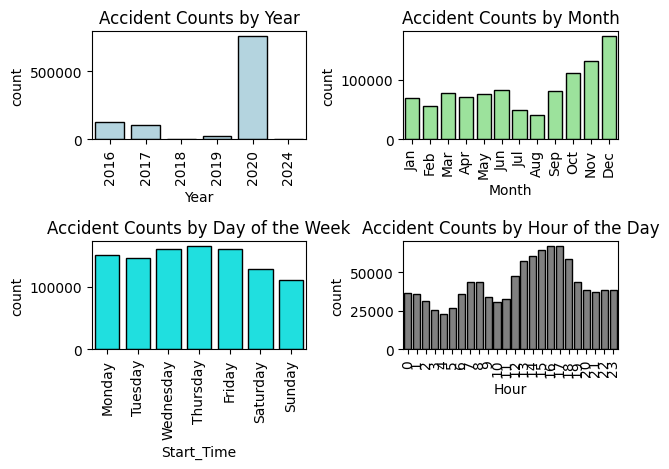

In [12]:
a_data['Start_Time'] = pd.to_datetime(a_data['Start_Time'], errors='coerce')
a_data['End_Time'] = pd.to_datetime(a_data['End_Time'], errors='coerce')

# Drop rows with missing or invalid datetime values
a_data.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

# Extract relevant time features
a_data['Year'] = a_data['Start_Time'].dt.year
a_data['Month'] = a_data['Start_Time'].dt.month
a_data['Day'] = a_data['Start_Time'].dt.day
a_data['Hour'] = a_data['Start_Time'].dt.hour

# Explore accident counts by year
plt.subplot(2, 2, 1)
sns.countplot(x='Year', data=a_data,color='lightblue',edgecolor='black')
plt.title('Accident Counts by Year')
plt.xticks(rotation=90)

# Explore accident counts by month
plt.subplot(2, 2, 2)
sns.countplot(x='Month', data=a_data,color='lightgreen',edgecolor='black')
plt.title('Accident Counts by Month')
plt.xticks(rotation=90)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)

# Explore accident counts by day of the week
plt.subplot(2, 2, 3)
sns.countplot(x=a_data['Start_Time'].dt.day_name(), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color='cyan',edgecolor='black')
plt.title('Accident Counts by Day of the Week')
plt.xticks(rotation=90)

# Explore accident counts by hour of the day
plt.subplot(2, 2, 4)
sns.countplot(x='Hour', data=a_data,color='gray',edgecolor='black')
plt.title('Accident Counts by Hour of the Day')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##Visualization of Accident Hotspots

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



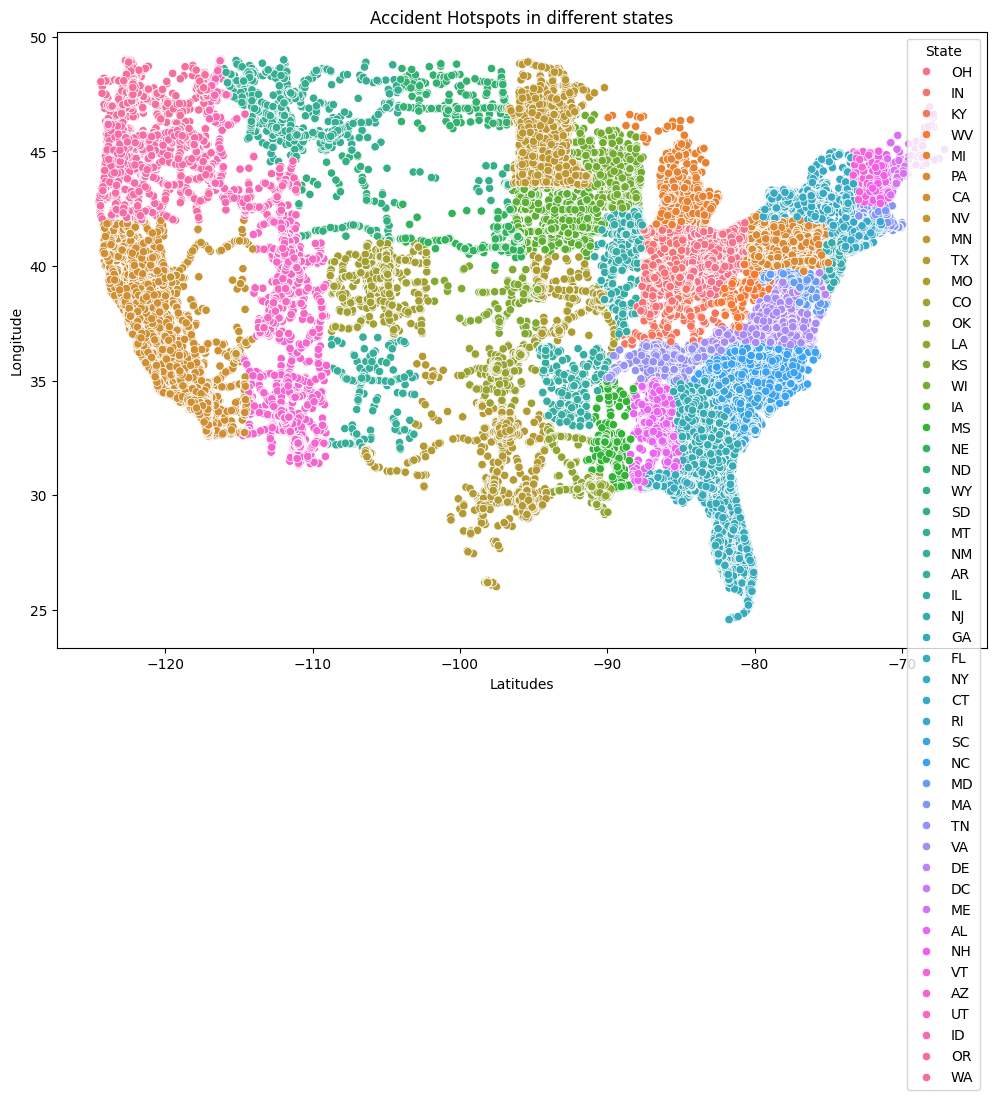

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=a_data.Start_Lat, x=a_data.Start_Lng, hue=a_data.State)
plt.xlabel("Latitudes")
plt.ylabel("Longitude")
plt.title("Accident Hotspots in different states")
plt.show()

In [28]:
import plotly.graph_objects as go

state_counts = a_data["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()


Accident occurring in various states

<ipython-input-30-e032b0852a05>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




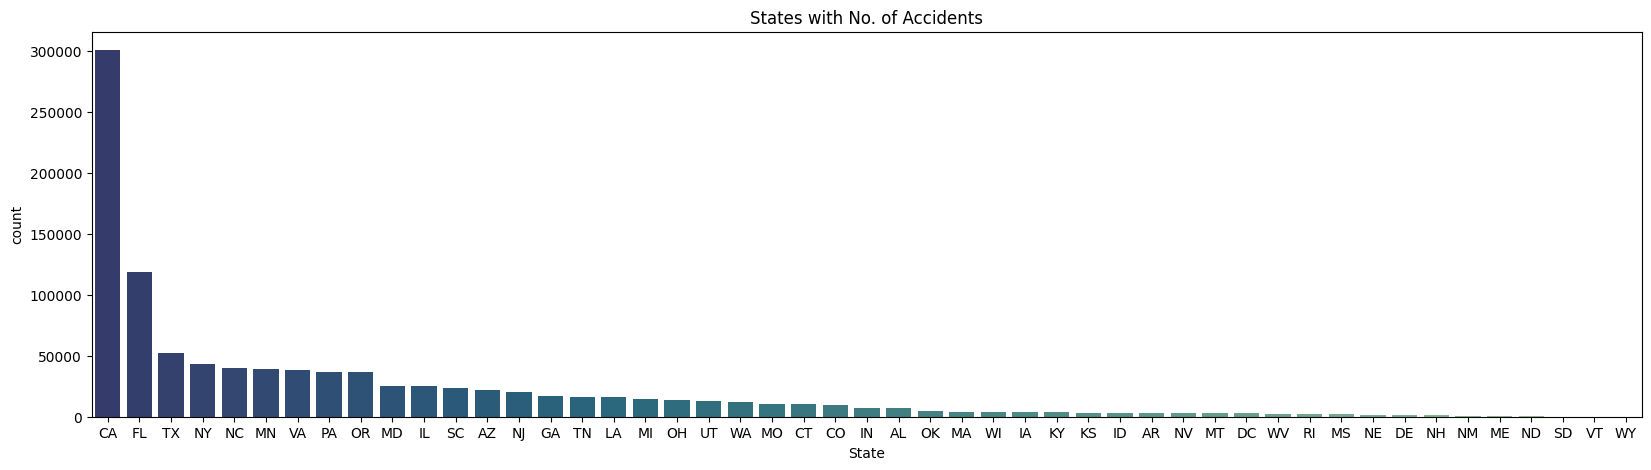

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=a_data, orient = 'v', palette = "crest_r", order = a_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");

Top 30 Cities with Highest No. of Accidents

<ipython-input-33-1f901242ec7c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-1f901242ec7c>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



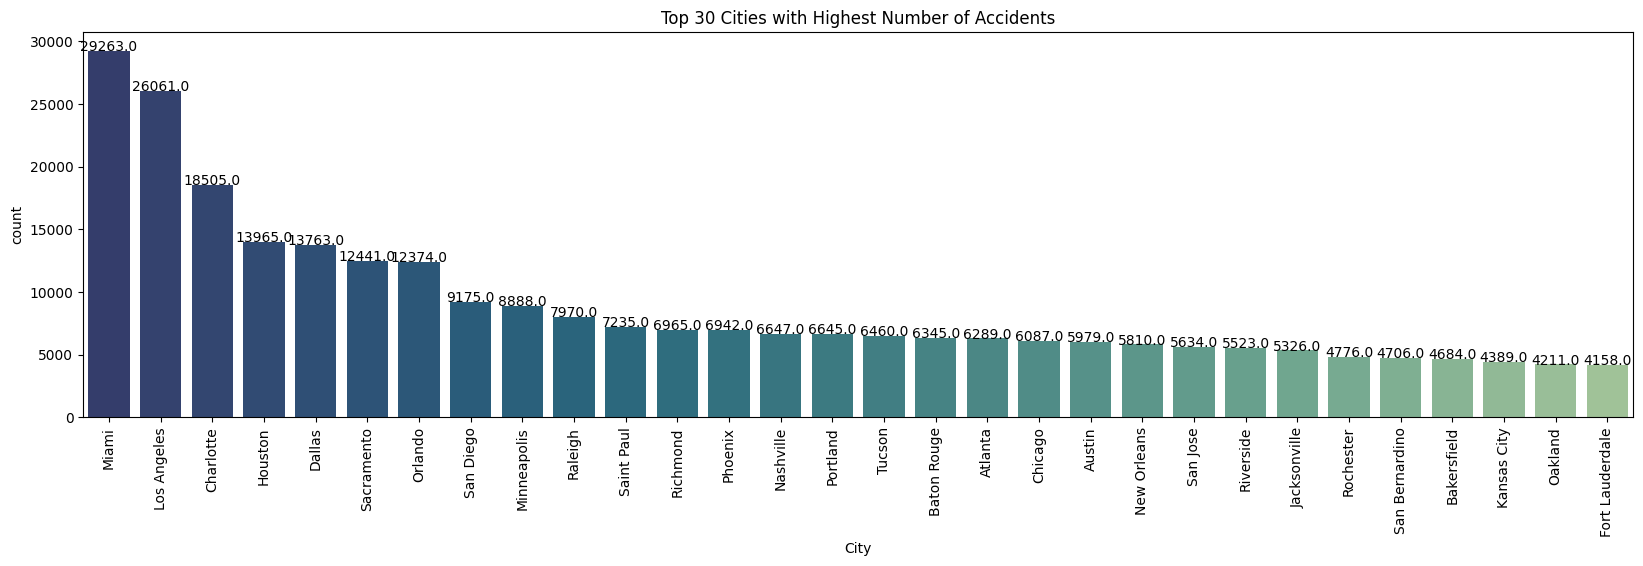

In [33]:
top_cities = a_data['City'].value_counts().iloc[:30].index

plt.figure(figsize=(20, 5))
c = sns.countplot(x="City", data=a_data, order=top_cities, orient='v', palette="crest_r")
c.set_title("Top 30 Cities with Highest Number of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)

for p in c.patches:
    c.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='baseline')

plt.show()